# 【DEO1611】The Language of Technical Computing (數學應用軟體簡介)



### ※ Note
* Upload your jupyter notebook before **12:00 noon 3/31**
* Late assignment would get 0% 
* Plagiarism(抄襲) is strictly prohibited, that is 0%
* You are encouraged to discuss with your parners (_Act together we go far_)
* Remember save your output and add comments beside your source code

## Python tutorial - Quiz2

### (35%) Question1: Numerical differentiation (數值微分) 


The derivative of a function $f$ at a point $x$ is defined by the limit.

$$
f'(x)=\lim_{h\to 0}{\frac {f(x+h)-f(x)}{h}}.
\tag{1}
$$

If $h$ is a fixed small value ($h>0$) instead of approaching zero, then the **forward** finite difference can be written as
$$
f'(x)\approx {\frac {f(x+h)-f(x)}{h}}.
\tag{2}
$$

Also, the **backward** finite difference can be written as
$$
f'(x)\approx {\frac {f(x)-f(x-h)}{h}}.
\tag{3}
$$

If we average the forward and backward difference, the **central** finite difference can be written as
$$
f'(x)\approx {\frac {f(x+h)-f(x-h)}{2h}}.
\tag{4}
$$

Reference:
1. https://en.wikipedia.org/wiki/Finite_difference
2. https://www.dam.brown.edu/people/alcyew/handouts/numdiff.pdf

#### (5%) 1. Create a 1-D array of the following formula in $[-5,5]$ with $\mu$=0, $\sigma$=1.2, and spacing $\Delta{x}$=0.001

<center>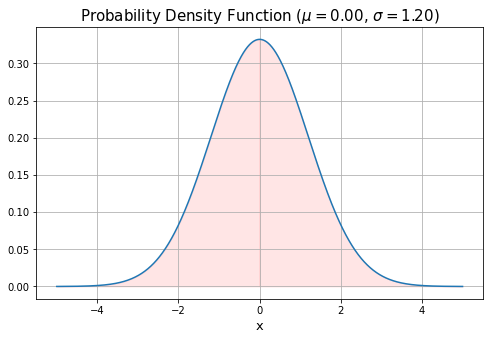</center>

</details>
<details><summary>Click here for figure soruce code 🧠</summary>

```python
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.fill_betweenx(y, x, color='red', alpha=0.1)
ax.grid(True)
ax.set_title(fr"Probability Density Function ($\mu={mu:.2f}$, $\sigma={sigma:.2f}$)", fontsize=15)
ax.set_xlabel("x", fontsize=13)
fig.show()
```
</details>


$$
\textrm{(probability density function)}\;
f(x;\mu, \sigma) = \dfrac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^2}
\tag{5}
$$


Please define a function called `pdf(x, mu, sigma)` accroding to Eqn 5 and `linspace(a, b, dx)` to generate the required 1-D array. Then create an 1-D array `x` in $[-5,5]$ with $\mu$=0, $\sigma$=1.2, and spacing $\Delta{x}$=0.001. Also, compute the pdf in $[-5,5]$ by `y=pdf(x, mu, sigma)`.


---
Hint: using the numpy function `np.linspace(start, stop, num)`

$$num = \left\lfloor \dfrac{stop-start}{step} \right\rfloor +１$$

(Reference: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

In [24]:
import numpy as np


# finish codes below! ---------------------------
def linspace(a, b, dx):
    #num of np.linspace only takes int, requires change from dx to num
    num = int((b-a)/dx)+1
    return np.linspace(a,b,num)

def pdf(x, mu, sigma):
    #return the pdf function
    return np.exp(-0.5*(((x-mu)/sigma)**2))/sigma/np.sqrt(2*np.pi)


mu = 0
sigma = 1.2
a = -5
b = 5
dx = 0.001

x = linspace(a,b,dx)
y = pdf(x,mu,sigma)
#------------------------------------------------

#### (15%) 2. Compute the central finite difference from the result in Question 1-1 for $1^{st}$-order derivative

The array `y` in Question 1-1 is $y_{0}, y_{1}, \cdots, y_{n-2}, y_{n-1}$

From the definition in of central-difference
$$f'(x)\approx {\frac {f(x+h)-f(x-h)}{2h}}$$

the discrete form of the above formula can be rewritten as
$$
y'[n] = \dfrac{y[n+1] - y[n-1]}{2\Delta},
\tag{6}
$$
where $n=1,2,\cdots,n-3,n-2$, and $h=\Delta$.

However, it should be noticed that the central-difference is invalid at the endpoints $y[0]$ and $y[n-1]$.

Therefore, you need to process the following three parts


$$
y'[i] = 
\begin{cases}
\dfrac{y[1] - y[0]}{\Delta}, \; i=0 \\
\dfrac{y[i+1] - y[i-1]}{2\Delta}, \; 1\le i \le n-2\\
\dfrac{y[n-1] - y[n-2]}{\Delta}, \; i=n-1 \\
\end{cases}
\tag{7}
$$

---
Hint: Slicing for dealing with $y[n+1]$ and $y[n-1]$

In [25]:
y_prime_fd = np.zeros_like(y)
#define n for later use
n = int((b-a)/dx)+1
# finish codes below! ---------------------------
#y'[1]=y[2]-y[0], y'[n-2]=y[n-1]-y[n-3]
#so range of y[n+1] is from y[2] to y[n-1]
#range of y[n-1] is from y[0] to y[n-3]
arr1 = y[2:n-1] # y[n+1]
arr2 = y[0:n-3] # y[n-1]

# Central-difference: y'[1] ~ y'[n-2]
y_prime_fd[1:n-2] = (arr1 - arr2) / (2*dx)

# Forward-difference: y'[0]
y_prime_fd[0] = (y[1] - y[0]) / dx

# Backward-difference: y'[n-1]
y_prime_fd[n-1] = (y[n-1] - y[n-2]) / dx
#------------------------------------------------
print(y_prime_fd)

#### (15%) 3. Plot a graph to show the computed $1^{st}$-order derivative in Question 1-2

<center>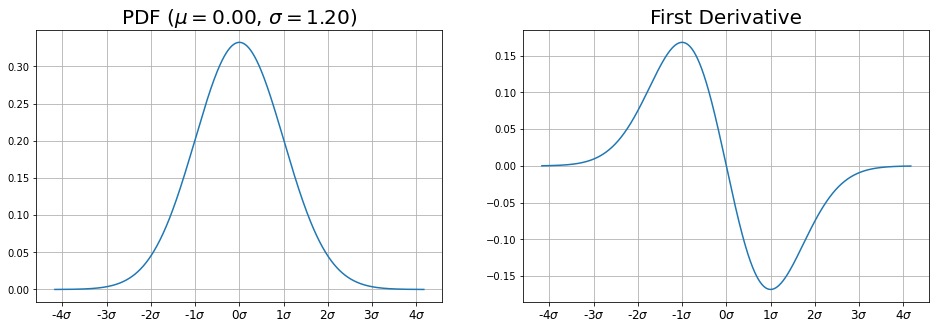</center>

Your graph should include these requirements:

* Title: 
    1. `fr"PDF ($\mu={mu:.2f}$, $\sigma={sigma:.2f}$)"` with `fontsize=20` in graph 1
    2. `"First Derivative"` with `fontsize=20` in graph 2
* Xticks: Coordinates for $-4\sigma \sim 4\sigma$
* Xticklabels: $-4\sigma \sim 4\sigma$ string `fr"{i}$\sigma$"` for Xticks
* Grid

Note: your graph should as similar as the above graph!

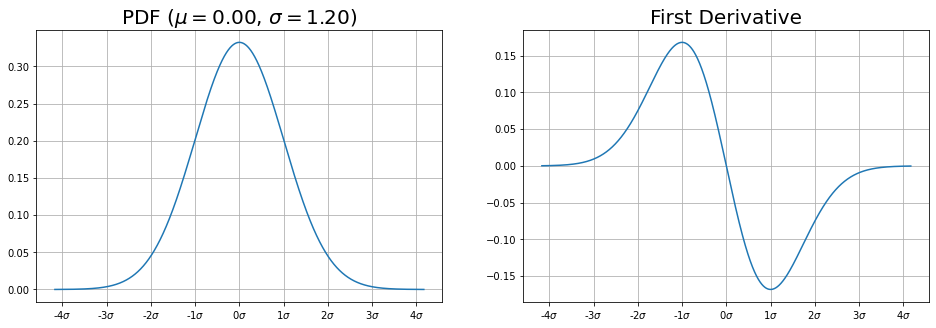

In [26]:
import matplotlib.pyplot as plt

# 先讓matplotlib知道刻度在甚麼位置，再把刻度取代成我們要的文字
# 1. set_xticks: let matplotlib know where should place ticks
# 2. set_xticklabels : replace ticks by desired strings

# finish codes below! ---------------------------
#form subplots in the same row
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

#subplot for pdf
axes[0].plot(linspace(a,b,dx),pdf(x,mu,sigma))
axes[0].grid(True)
#require range=-4~4 ->range(-4,5)
axes[0].set_xticks([i*sigma for i in range(-4,5)])
axes[0].set_xticklabels([fr"{i}$\sigma$" for i in range(-4,5)], fontsize=10)
axes[0].set_title(fr"PDF ($\mu={mu:.2f}$, $\sigma={sigma:.2f}$)", fontsize=20)

#subplot for first derivative
axes[1].plot(linspace(a,b,dx), y_prime_fd)
axes[1].grid(True)
axes[1].set_xticks([i*sigma for i in range(-4,5)])
axes[1].set_xticklabels([fr"{i}$\sigma$" for i in range(-4,5)], fontsize=10)
axes[1].set_title("First Derivative", fontsize=20)
plt.show()
#------------------------------------------------

### (65%) Question2. Discrete Fourier transform (離散傅立葉轉換)

The discrete Fourier transform (DFT) transforms a sequence of N complex numbers $\left\{\mathbf{x_{n}} \right\} := x_{0}, x_{1}, \ldots, x_{N-1}$ into another sequence of complex numbers $\left\{\mathbf {X_{k}} \right\}:=X_{0},X_{1},\ldots ,X_{N-1}$.

$$\mathbf{x_{n}} \xrightarrow{\mathscr{F}} \mathbf{X_{k}}$$
$$\mathbf{X_{k}} \xrightarrow{\mathscr{F^{-1}}} \mathbf{x_{n}}$$


The formula of DFT is shown below,
$$
X_{k} = \sum _{n=0}^{N-1}x_{n}\cdot e^{-{\frac {i2\pi }{N}}kn}
\tag{8}
$$

#### (15%) 1. Construct a 1-d array of rectangle function satisfying the following requirements

$$
\Pi\left(\dfrac{x}{\tau}\right) = 
\begin{cases}
1, \; |x| < \dfrac{\tau}{2},\\
\dfrac{1}{2}, \; |x| = \dfrac{\tau}{2}, \\
0, \; \text{otherwise}
\end{cases}
\tag{9}
$$


Please constrcut a 1-d array of $\Pi(2.5x)$ in the range $[-5,5]$ with spacing $\Delta{x}=0.01$

---
Hint:

* `np.linspace(start, stop, num)`
* `np.where(condition, [x, y, ]/)`

$$num = \left\lfloor \dfrac{stop-start}{step} \right\rfloor +１$$

(Reference: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

In [87]:
# finish codes below! ---------------------------
import numpy as np

def rect(x, tau):
    #if |x|>tau/2 return 0, else return 1
    y = np.where(np.abs(x) > tau/2, 0, 1)
    #if |x|=tau/2 return 0.5, else remain the same value from above
    y = np.where(np.isclose(np.abs(x), tau/2), 0.5, y)
    return y

#2.5x=x/tau->tau=1/2.5
tau = 1/2.5
a = -5
b = 5
dx = 0.01

x = linspace(a,b,dx)
y = rect(x,tau)
#------------------------------------------------

#### (15%) 2. Construct a DFT matrix

Let's take a close look at the DFT formula,
$$
{\begin{aligned}
X_{k} 
&= \sum _{n=0}^{N-1}x_{n}\cdot e^{-{\frac {i2\pi }{N}}kn} \\
&= \sum _{n=0}^{N-1}x_{n}\cdot \omega^{kn}, \; \text{where} \; \omega= e^{-{\frac {i2\pi }{N}}}.
\end{aligned}}
\tag{10}
$$

For $k=0$,
$$
{\begin{aligned}
X_{k=0} 
&= \sum _{n=0}^{N-1}x_{n}\cdot \omega^{0\cdot n} \\
&= \begin{bmatrix}1& 1& 1& \cdots &1 &1 \end{bmatrix}
\cdot
\begin{bmatrix}
x_0 \\ x1 \\ x2 \\ \vdots \\ x_{N-2} \\ x_{N-1}
\end{bmatrix}
\end{aligned}}
$$

For $k=1$,
$$
{\begin{aligned}
X_{k=1} 
&= \sum _{n=0}^{N-1}x_{n}\cdot \omega^{1\cdot n} \\
&= \begin{bmatrix}1& \omega^{1}& \omega^{2}& \cdots &\omega^{N-2} &\omega^{N-1} \end{bmatrix}
\cdot
\begin{bmatrix}
x_0 \\ x1 \\ x2 \\ \vdots \\ x_{N-2} \\ x_{N-1}
\end{bmatrix}
\end{aligned}}
$$

For $k=2$,
$$
{\begin{aligned}
X_{k=1} 
&= \sum _{n=0}^{N-1}x_{n}\cdot \omega^{2\cdot n} \\
&= \begin{bmatrix}1& \omega^{2}& \omega^{4}& \cdots &\omega^{2(N-2)} &\omega^{2(N-1)} \end{bmatrix}
\cdot
\begin{bmatrix}
x_0 \\ x1 \\ x2 \\ \vdots \\ x_{N-2} \\ x_{N-1}
\end{bmatrix}
\end{aligned}}
$$


From the observation of the above cases $k=0, 1,$ and $2$,
the row vectors can be stack along axis=0 to be the following expression,


$$
\begin{bmatrix}
X_0 \\ X1 \\ X2 \\ \vdots \\ X_{N-2} \\ X_{N-1}
\end{bmatrix}
= 
{\begin{bmatrix}
1&1&1&1&\cdots &1\\1&\omega &\omega ^{2}&\omega ^{3}&\cdots &\omega ^{N-1}\\
1&\omega ^{2}&\omega ^{4}&\omega ^{6}&\cdots &\omega ^{2(N-1)}\\
1&\omega ^{3}&\omega ^{6}&\omega ^{9}&\cdots &\omega ^{3(N-1)}\\
\vdots &\vdots &\vdots &\vdots &\ddots &\vdots \\
1&\omega ^{N-1}&\omega ^{2(N-1)}&\omega ^{3(N-1)}&\cdots &\omega ^{(N-1)(N-1)}\end{bmatrix}}
\begin{bmatrix}
x_0 \\ x1 \\ x2 \\ \vdots \\ x_{N-2} \\ x_{N-1}
\end{bmatrix}
\tag{11}
$$

Therefore, the DFT can be expressed in matrix formulation such that,
$$
X=Wx.
\tag{12}
$$

Please construct a DFT matrix to transform the rectangle 1-d array in Question 2-1.

You can follow these steps to construct a DFT matrix:  
1. Construct a 2-d array with $k\cdot n$ (rows:k, cols:n)
2. compute $e^{-{\frac {i2\pi }{N}}kn}$ by `np.exp()`
3. Finally, you would get a DFT matrix

---
Hint:
 * `N`: the length of the 1-d array *x*
 * Complex number: e.g., `3+4j`
 * broadcasting
 * `np.exp()`

In [89]:
# finish codes below! ---------------------------

# Length of 1-D array
N = len(rect(x,tau))

# Construct DFT matrix
#arrange N into 1*N and N*1 array
n = np.arange(N).reshape(1,N) # a row-like array
k = np.arange(N).reshape(N,1) # a col-like array
W = np.exp(-1j * 2*np.pi * k * n / N)

#------------------------------------------------


#### (15%) 3. DFT of the rectangle function

Please use the DFT matrix in Question 2-2 to transform the rectangle 1-d array in Question 2-1.

$$
X=Wx
$$

Also, because we want the DC term (k=0) to be loacted at the center of the spectrum; thus, the spectrum $X$ need to be shift by $\lfloor N/2 \rfloor$



The x-axis of DFT is defined as frequency (Hz), which can be derived by the follwing formula accroding to sampling theorem,

$$
f_x = 
\begin{cases}
\dfrac{1}{\Delta{x}N} \left[-{\frac{N}{2}},{\frac{N}{2}}-1\right], \; \textrm{if $N$ is even} \\
\dfrac{1}{\Delta{x}N} \left[-{\frac {N-1}{2}},{\frac {N-1}{2}}\right], \; \textrm{if $N$ is odd}
\end{cases}
\tag{13}
$$

where $\Delta{x}$ is the sampling period or $1/\Delta{x}$ is the sampling frequency, and $N$ is the length of the sampling points.


---
Hint:
 * matrix multiplication $A\cdot B$: `np.dot(A, B)`, `A.dot(B)`, `A @ B`
 * Circular shift an array: `np.roll()`
    ```python
>>> x = np.arange(10)
>>> x
array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
>>> np.roll(x, 2)
array([8, 9, 0, 1, 2, 3, 4, 5, 6, 7])
>>> np.roll(x, -2)
array([2, 3, 4, 5, 6, 7, 8, 9, 0, 1])
    ```

In [107]:
# finish codes below! ---------------------------
# Matrix multiplication
#X=W*x->X=W*rect(x,tau)=W*y
X = np.dot(W,y)

# Circular shift by floor(N/2)
X = np.roll(X, int(N/2))

# Frequency axis in spectrum
#if N is even
if N % 2 == 0:
    fx = np.linspace(-0.5*N, 0.5*N-1, N) / (dx * N)
#if N is odd
else:
    fx = np.linspace(-0.5*(N-1), 0.5*(N-1), N) / (dx * N)
#------------------------------------------------


#### (20%) 4. Plot the result to compare $X_k$ and $x_n$

<center>
  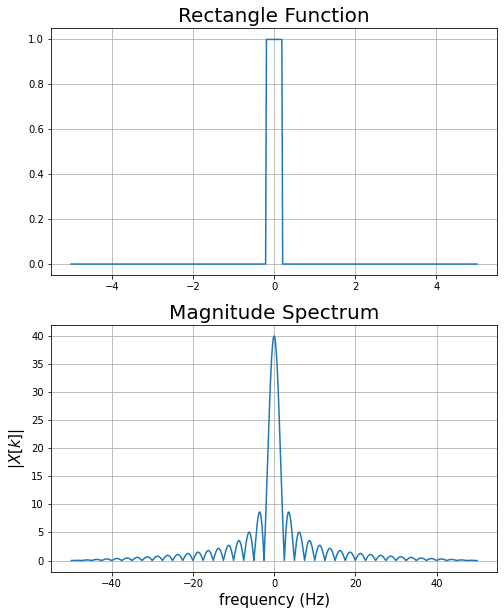
</center>


Your graph should include these requirements:

* Graph 1
    * Title: `"Rectangle Function"` with fontsize 20
    * Grid

* Graph 2: Plot the magnitude of $X_k$, that is, $|X_k|$
    * Title: `"Magnitude Spectrum"` with fontsize 20
    * Xlabel: `"frequency (Hz)"` with fontsize 15
    * Ylabel: `r"$|X[k]|$"` with fontsize 15
    * Grid

Note: your graph should as similar as the above graph!

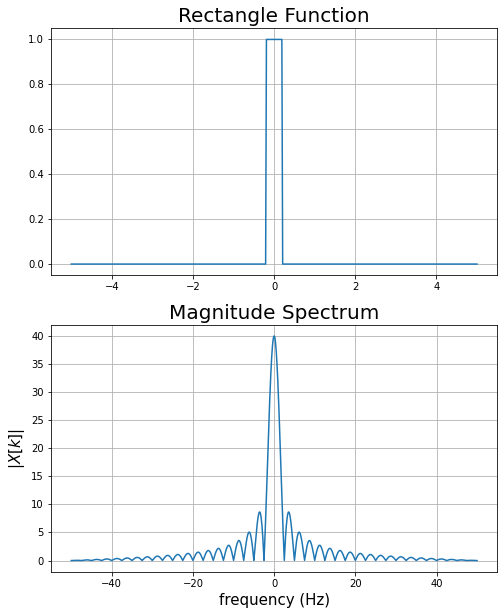

In [108]:
# finish codes below! ---------------------------
import matplotlib.pyplot as plt

#subplot for Rectangle Function
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
axes[0].plot(linspace(a,b,dx),rect(x,tau))
axes[0].grid(True)
axes[0].set_title(fr"Rectangle Function", fontsize=20)

#subplot for Magnitude Spectrum 
#x=fx,y=|X|
axes[1].plot(fx, np.abs(X))
axes[1].grid(True)
axes[1].set_title(fr"Magnitude Spectrum", fontsize=20)
axes[1].set_xlabel(fr"frequency (Hz)", fontsize=15)
axes[1].set_ylabel(fr"$|X[k]|$", fontsize=15)
plt.show()
#------------------------------------------------

### (10%) Bonus: Newton's method

Taylor series for $f(x)$ about $x=a$ is,

$$
\begin{align}
f(x) &= \sum^{\infty}_{n=0}{\dfrac{f^{(n)}(a)}{n!}(x-a)^{n}} \\
&= f\left( a \right) + f'\left( a \right)(x-a) + \frac{{f''\left( a \right)}}{{2!}}{(x-a)^2} + \frac{{f'''\left( a \right)}}{{3!}}{(x-a)^3} + \cdots \\
&\approx f\left( a \right) + f'\left( a \right)(x-a)
\end{align}
\tag{14}
$$

If we set $a=x_{n}$, and set $f(x)=0$ for finding the roots of the equation, then the Taylor expansion can be written as

$$
\begin{align}
0 = f(x_{n}) - f'(x_{n})(x - x_{n})
\end{align}
$$

Finally, we can get this relationship below

$$
\begin{align}
x_{n+1} = x_{n} - \dfrac{f(x_{n})}{f'(x_{n})},\; \text{where} \; f'(x_{n})=\dfrac{f(x_{n}+\Delta{x})-f(x_{n}-\Delta{x})}{2 \Delta{x}} \; \text{(finite difference)}
\end{align}
\tag{15}
$$

</br>

* Please find the root of $f(x)=x^{5} - 2x^{4} + 2x^{3} - 3x^{2} - x + 2$ with initial  $x_{0}=1.4$, and the $\Delta{x}$ for calculating $f'(x)$ is $0.001$.

<center>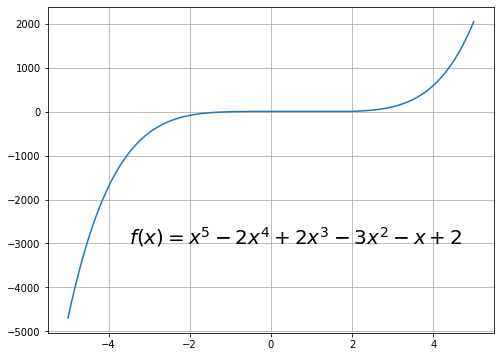</center>


</details>
<details><summary>Click here for figure soruce code 🧠</summary>

```python
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 3001)
y = f(x)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(x, y)
ax.text(-3.5, -3000, r"$f(x)=x^{5} - 2x^{4} + 2x^{3} - 3x^{2} - x + 2$", fontsize=20)
ax.grid(True)
fig.show()
```
</details>

---
Hint:
```
x: -4.060981  f(x): -1.825774e+03
x: -3.156215  f(x): -5.992898e+02
x: -2.430167  f(x): -1.965036e+02
x: -1.849169  f(x): -6.406167e+01
x: -1.390468  f(x): -2.046013e+01
x: -1.044508  f(x): -6.131402e+00
x: -0.816413  f(x): -1.522734e+00
x: -0.711196  f(x): -2.192634e-01
x: -0.690232  f(x): -7.326349e-03
x: -0.689482  f(x): -9.092095e-06
x: -0.689481  f(x): -2.549383e-11
--------------------------------------------------
Find root at x = -0.689481
```

In [116]:
x0 = 1.4 # Initial guess
dx = 0.001 # delta x
tol = 1e-10 # tolerance
iter = 20 # iterations


# finish codes below! ---------------------------
#function of f(x)
f = lambda x: pow(x,5)-2*pow(x,4)+2*pow(x,3)-3*pow(x,2)-x+2 # f(x)
#function of f'(x)
df = lambda x, dx: (f(x+dx)-f(x-dx))/2/dx # central-difference


# first iteration
x = x0
print(f"x: {x:.6f}  f(x): {f(x):.6e}")


for i in range(1, iter):
    #x_n+1=x_n-f(x_n)/f'(x_n)
    x = x-f(x)/df(x,dx)

    print(f"x: {x:.6f}  f(x): {f(x):.6e}")

    # if the solution approach to zero, break out of the for loop
    if abs(f(x)) < tol:
        print("-"*50)
        print(f"Find root at x = {x:.6f}")
        break
#------------------------------------------------

x: 1.400000  f(x): -2.096960e+00
x: -4.060981  f(x): -1.825774e+03
x: -3.156215  f(x): -5.992898e+02
x: -2.430167  f(x): -1.965036e+02
x: -1.849169  f(x): -6.406167e+01
x: -1.390468  f(x): -2.046013e+01
x: -1.044508  f(x): -6.131402e+00
x: -0.816413  f(x): -1.522734e+00
x: -0.711196  f(x): -2.192634e-01
x: -0.690232  f(x): -7.326349e-03
x: -0.689482  f(x): -9.092095e-06
x: -0.689481  f(x): -2.549383e-11
--------------------------------------------------
Find root at x = -0.689481


### (20%) Bonus: Visualize two-dimensional function

Please plot the Ackley function satisfying the following requirements.

$$f(x,y)=-20\exp \left[-0.2{\sqrt {0.5\left(x^{2}+y^{2}\right)}}\right] -\exp \left[0.5\left(\cos 2\pi x+\cos 2\pi y\right)\right]+e+20$$

<center>
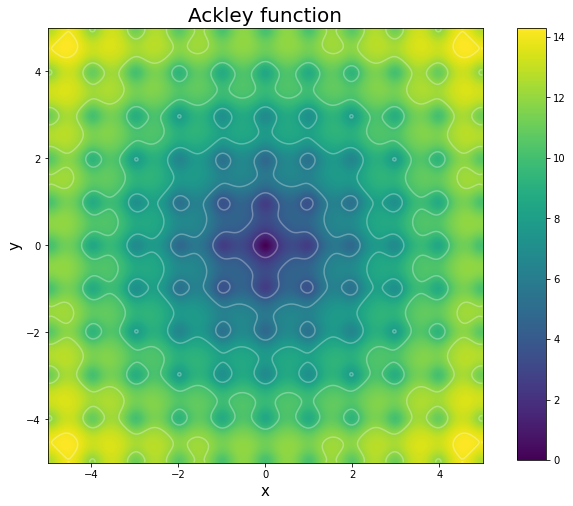
</center>

1. Create a function to output the value of Ackley function `Ackley(x, y)`
    * x, y in the range $[-5, 5]$ with 501 sample points
    * ***You are required to create the 2-D array by broadcasting or you would only get 5 points in this bonus***
    * ***You are required to create the 2-D array by broadcasting or you would only get 5 points in this bonus***
    * ***You are required to create the 2-D array by broadcasting or you would only get 5 points in this bonus***


Your graph should include these requirements:

* Title: `"Ackley function"` with fontsize 20
* Xlabel: `"x"` with fontsize 15
* Ylabel: `"y"` with fontsize 15
* Imshow:
    * Extent: **???**
    * Origin: **???**
* Contour:
    * levels: 8
    * colors: `'white'`
    * alpha: 0.3
    * Extent: **???**
    * Origin: **???**


Note: your graph should as similar as the above graph!

In [152]:
import numpy as np
import matplotlib.pyplot as plt

#the Ackley function 
def Ackley(x, y):
    return -20*np.exp(-0.2*np.sqrt(0.5*(x**2+y**2)))-np.exp(0.5*(np.cos(2*x*np.pi)+np.cos(2*y*np.pi)))+np.exp(1)+20

#-5<=x,y<=5 with 501 sample points and reshape to 2D array
x = np.linspace(-5, 5, 501).reshape(1,501) # row-like 2-d array
y = np.linspace(-5, 5, 501).reshape(501,1) # col-like 2-d array
z = Ackley(x, y)



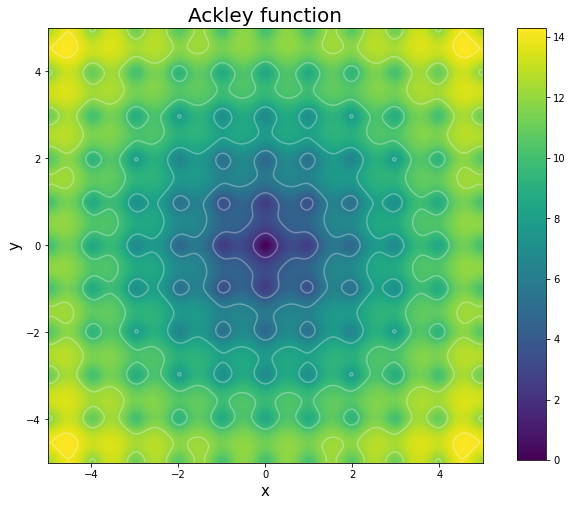

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
cax = fig.add_axes([0.95, 0.13, 0.05, 0.75]) # [left, bottom, width, height]
#extent= the edge of the subpolot
#origin=place of (0,0)
im = ax.imshow(z, extent=[x.min(), x.max(), y.min(), y.max()], origin="lower")
#level=Determines the number and positions of the contour lines / regions.
#colors= the lines for contour 
#alpha=The alpha blending value, between 0 (transparent) and 1 (opaque)
ax.contour(z, levels=8, colors='white', alpha=0.3, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower')
ax.set_title(fr"Ackley function", fontsize=20)
ax.set_xlabel(fr"x", fontsize=15)
ax.set_ylabel(fr"y", fontsize=15)
fig.colorbar(im, cax=cax)
plt.show()